In [19]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [20]:
#generate the sample
def gen_data():
    nobs = 1000
    beta = 3
    x = np.random.uniform(low=-1., high=1., size=nobs)
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs) #uniform(low=-1., high=1., size=nobs)  #(loc=0.0, scale=1.0, size=nobs) ##
    y = 1*(1 + beta * x + e >= 0) 
    return y,x,nobs

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                         Probit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                  0.5305
Time:                        17:04:46   Log-Likelihood:                -300.96
converged:                       True   LL-Null:                       -641.04
Covariance Type:            nonrobust   LLR p-value:                6.209e-150
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0127      0.078     12.988      0.000       0.860       1.165
x1             2.9973      0.172     17.442      0.000       2.660       3.334
                           Logit Regression Results 

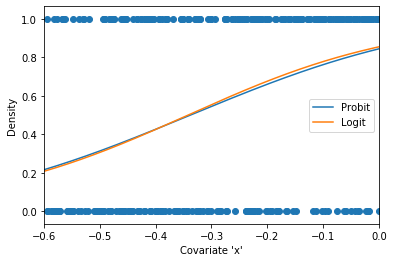

In [21]:
yn,xn, nobs = gen_data()
support = np.arange(-3,3,1/nobs)
model1 = sm.Probit(yn,sm.add_constant(xn))
model1 = model1.fit(disp=False)
print(model1.summary())
model1_fit =  norm.cdf(model1.params[0] + model1.params[1]*support)

model2 = sm.Logit(yn,sm.add_constant(xn))
model2 = model2.fit(disp=False)
logit = lambda x: np.exp(x)/(1+np.exp(x))
model2_fit = logit(model2.params[0] + model2.params[1]*support)
print(model2.summary())

plt.scatter(xn,yn)
plt.plot(support,model1_fit,label="Probit")
plt.plot(support,model2_fit,label="Logit")
plt.legend()

plt.ylabel("Density")
plt.xlabel("Covariate 'x'")
plt.xlim((-1.2,.8))
plt.savefig('figs/nonnested')
plt.xlim((-.6,-0.0))
plt.savefig('figs/nonnested_zoom')
plt.show()

In [ ]:
#N(0,1) epsilon, U[-1,1] x/ a= b= 
#U[-1,1] epsilon, U[-1,1] x/ a= b= 